In [1]:
import os

import numpy as np
from astropy.io import fits #To read in FITS files and tables

#For plotting
import matplotlib
import matplotlib.pyplot  as plt

In [40]:
# Models from: https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/castelli-and-kurucz-atlas
grid_dir="/data/rowe/atlas/ck04models/" #base directory for ATLAS models
mh='p00' #metallicity 
teff=3500 #3500 -- 13000 in steps of 250 K are available

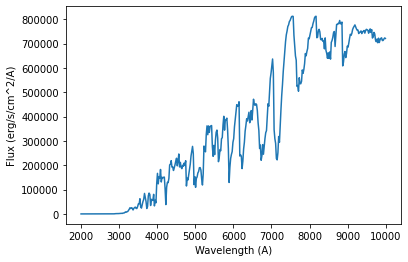

In [41]:
specfile=grid_dir+'ck'+mh+'/'+'ck'+mh+'_'+str(teff)+'.fits'
if os.path.isfile(specfile):
    havespectrum=True
    hdul = fits.open(specfile)
    data = hdul[1].data #the first extension has table
    wv=data['WAVELENGTH'] #Units are Angstrom
    flux=data['g45'] #Units are erg/s/cm^2/A
else:
    havespectrum=False
    print('Spectrum not found: ',specfile)
    
if havespectrum:
    w1=2000
    w2=10000
    plt.plot(wv[(wv>w1)&(wv<w2)],flux[(wv>w1)&(wv<w2)])
    plt.xlabel('Wavelength (A)')
    plt.ylabel('Flux (erg/s/cm^2/A)')
    plt.show()